# Speaker Identification

## Dataset Download

VoxCeleb is an audio-visual dataset consisting of short clips of human speech, extracted from interview videos uploaded to YouTube. The dataset consists of two versions, VoxCeleb1 and VoxCeleb2. For this project, VoxCeleb1 dataset was selected. VoxCeleb1 contains 2 sets of files, Dev files and Test files. Test files contains speakers’ ids that are not included in the Dev files, so they could not be used as a test set for our classification task. For this reason, only DEV files were used. To download VoxCeleb1 dataset (https://www.robots.ox.ac.uk/~vgg/data/voxceleb/vox1.html), the following steps were followed:

1. The following files were downloaded:
```
vox1_dev_wav_partaa
vox1_dev_wav_partab
vox1_dev_wav_partac
vox1_dev_wav_partad
```

2. The files were concatenated using the following command:
```
cat vox1_dev* > vox1_dev_wav.zip
```

3. The vox1_dev_wav.zip file was then extracted.

## Μetadata Download
A file with full names, nationality and gender labels for all the speakers was downloaded by clicking on the following link:

https://www.robots.ox.ac.uk/~vgg/data/voxceleb/meta/vox1_meta.csv


# File Exploration

The dataset consists of over 100,000 utterances for 1,251 celebrities. For this project, only 10 speakers was selected. To create the new dataset for the classification task, 10 speakers with a large number of audio files were selected.

In [68]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob

In [4]:
# load voxceleb data
dev_dir = 'data' + os.sep + 'voxceleb_data' + os.sep + 'wav'

In [69]:
def map_files_to_ids(dir):
    """
    This functions creates a dictionary that maps the speakers ids to their audio files.

    :param dir: a directory of audio files having the structure of voxceleb data folders
    :return: a dictionary that maps speakers ids with to their audio files
    """
    files_dict = {}
    for folder in os.listdir(dir):
        id = folder
        folder = os.path.join(dir,folder)
        files = []
        for subfolder in os.listdir(folder):
            subfolder = os.path.join(folder, subfolder)
            for file in os.listdir(subfolder):
                audio_file = os.path.join(subfolder, file)
                files.append(audio_file)
            files_dict[id] = files
    return files_dict


In [6]:
# map speakers to their audio files
dev_files = map_files_to_ids(dev_dir)

# print first speaker and their audio files
subdict = {k: dev_files[k] for k in list(dev_files)[:1]}
subdict

{'id10001': ['data\\voxceleb_data\\wav\\id10001\\1zcIwhmdeo4\\00001.wav',
  'data\\voxceleb_data\\wav\\id10001\\1zcIwhmdeo4\\00002.wav',
  'data\\voxceleb_data\\wav\\id10001\\1zcIwhmdeo4\\00003.wav',
  'data\\voxceleb_data\\wav\\id10001\\7gWzIy6yIIk\\00001.wav',
  'data\\voxceleb_data\\wav\\id10001\\7gWzIy6yIIk\\00002.wav',
  'data\\voxceleb_data\\wav\\id10001\\7gWzIy6yIIk\\00003.wav',
  'data\\voxceleb_data\\wav\\id10001\\7gWzIy6yIIk\\00004.wav',
  'data\\voxceleb_data\\wav\\id10001\\7w0IBEWc9Qw\\00001.wav',
  'data\\voxceleb_data\\wav\\id10001\\7w0IBEWc9Qw\\00002.wav',
  'data\\voxceleb_data\\wav\\id10001\\7w0IBEWc9Qw\\00003.wav',
  'data\\voxceleb_data\\wav\\id10001\\7w0IBEWc9Qw\\00004.wav',
  'data\\voxceleb_data\\wav\\id10001\\7w0IBEWc9Qw\\00005.wav',
  'data\\voxceleb_data\\wav\\id10001\\7w0IBEWc9Qw\\00006.wav',
  'data\\voxceleb_data\\wav\\id10001\\7w0IBEWc9Qw\\00007.wav',
  'data\\voxceleb_data\\wav\\id10001\\7w0IBEWc9Qw\\00008.wav',
  'data\\voxceleb_data\\wav\\id10001\\7w0IBE

### Selection of 10 speakers

<AxesSubplot:title={'center':'Number of files per speaker\n(for top 20 speakers with most audio files)'}>

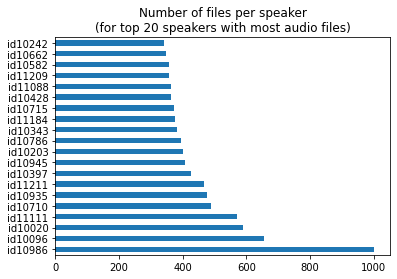

In [72]:
# get number of audio files per speaker 
files = pd.Series(dtype=float)
new_dict = {}
ids = dev_files.keys()
for id in ids:
    files[id] = len(dev_files[id])

# get the 20 speakers with the most audio fi
files = files.sort_values(ascending=False)
files.iloc[:20].plot.barh(title='Number of files per speaker\n(for top 20 speakers with most audio files)')


The 4 speakers with the most audio files (id10986, id10096, id10020, id11111) were not selected since they have a very large amount of files, which would make our subset unbalanced.

In [73]:
# select 10 best speakers
files_to_keep = files.iloc[4:14] 
ids = files_to_keep.index.to_list()

# get all audio files to be used for classification
files_dict = {id: dev_files[id] for id in ids}

## Split dataset to training, validation and test set

The dataset was split it into a training, validation, and a test set with a 80/10/10 split. After computing the number of files that each speaker should have, we then create dictionaries mapping the speakers to their audio files for each one of the 3 datasets.

In [74]:
# get total number of files per user for the validation and the test set
total_files = files_to_keep.sum()
test_files_num = int(total_files * 10 / 100)
val_files_num = int(total_files * 10 / 100)
train_files_num = int(total_files - (test_files_num + val_files_num))
files_per_id = round(test_files_num / files.shape[0])

In [75]:
# create training, validation and test set 
train_files = {}
val_files = {}
test_files = {}
for id in ids:
    train_files[id] = dev_files[id][files_per_id*2:]
    val_files[id] = dev_files[id][:files_per_id-1]
    test_files[id] = dev_files[id][files_per_id:files_per_id*2]

<AxesSubplot:title={'center':'Number of audio files per dataset'}>

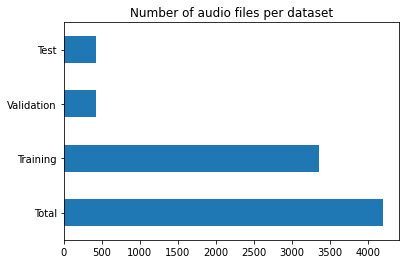

In [76]:
files_info = pd.Series({'Total': total_files, 'Training': train_files_num, 'Validation': val_files_num, 'Test': test_files_num})
files_info.plot.barh(title='Number of audio files per dataset')

# Explore Data

In [14]:
# load voxceleb metadata
metadata = pd.read_csv(os.path.join('data', 'vox1_meta.csv'), sep='\t')

# get the metadata for the voxceleb1 subset we have created 
ids = files_dict.keys()
metadata = metadata.loc[metadata['VoxCeleb1 ID'].isin(ids)]
metadata

,VoxCeleb1 ID,VGGFace1 ID,Gender,Nationality,Set
202,id10203,David_Attenborough,m,UK,dev
342,id10343,Gloria_Steinem,f,USA,dev
396,id10397,J.J._Abrams,m,USA,dev
709,id10710,Louis_C.K.,m,USA,dev
714,id10715,Lucie_Arnaz,f,USA,dev
785,id10786,Meat_Loaf,m,USA,dev
934,id10935,Peter_Jackson,m,New Zealand,dev
944,id10945,Quentin_Tarantino,m,USA,dev
1183,id11184,Tom_Hooper,m,UK,dev
1210,id11211,Vince_Gilligan,m,USA,dev


Text(0.5, 1.0, 'Gender Distribution')

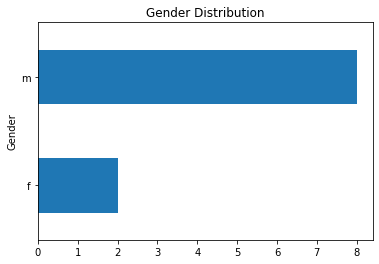

In [15]:
# plot of gender distribution
metadata.reset_index(drop=True, inplace=True)
group_gender = metadata.groupby(['Gender']).size()
fig = group_gender.plot.barh()
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Nationality Distribution')

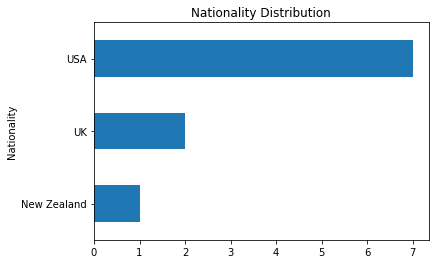

In [16]:
# plot of nationality distribution
group_nation = metadata.groupby(['Nationality']).size()
fig = group_nation.plot.barh()
plt.title('Nationality Distribution')

By observing the above plots, we conclude that our dataset is balanced in terms of the number of audio files per user, but it is very unbalanced in terms of the gender and nationality of the speakers. 


# Audio Preprocessing

The audio clips of the speakers were converted to spectrograms in order to be fed to our model. Before converting them to images, some preprocessing stes had to be made.

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import librosa
from pyAudioAnalysis.audioBasicIO import stereo_to_mono, read_audio_file
import librosa.display

C:\Users\sandy\anaconda3\envs\vertEnv1\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [22]:
# check if audio files have the same sample rate
sample_rates = []
for id in files_dict.keys(): 
    for file in files_dict[id]:  
        sample_rate, _ = read_audio_file(file) 
        sample_rates.append(sample_rate)
sample_rates = np.asarray(sample_rates)
sample_rates = np.unique(sample_rates)
if len(sample_rates) == 1:
    print(f'All audio files have the same sample rate: {sample_rates[0]} kHz')
    print('There is no need to resample any files.')
else:
    print('The audio files have different sample rates.')

All audio files have the same sample rate: 16000 kHz
There is no need to resample any files.


## Spectrograms

In [114]:
def audio_to_spectrogram(file):
    """
    takes an audio file and returns its Mel spectrogram 

    :param file: filepath of an audio file
    :return: spectrogram of the audio wave as a numpy array
    """
    # load audio file
    sample_rate, samples = read_audio_file(file)
    # convert audio to mono (if stereo) 
    mono_signal = stereo_to_mono(samples)
    mono_signal = mono_signal.astype(np.float32)
    # get spectrogram as numpy array
    spectrogram = librosa.feature.melspectrogram(mono_signal, sample_rate, n_fft=2048, hop_length=2048, n_mels=128) 
    return spectrogram

## Resize Spectrograms

In [49]:
def pad_or_crop_spectrogram(spec, best_width):
    """
    This function:
    - crops a spectrogram image to have width equal to the 95th percentile of all widths if it has less
    - pads a spectrogram image with zeros to have width equal to the 95th percentile of all widths if it has more

    :param spec: spectrogram as a numpy array
    :param best_width: the width the input image's width has to be resized to
    :return: padded or cropped spectrogram 
    """
    img_width = spec.shape[1]
    max_width = best_width
    if img_width > max_width:
        spec = spec[:, :max_width]  
    elif img_width < max_width:
        pad_width = max_width - img_width
        left_pad_width = int(pad_width / 2)
        right_pad_width = np.abs(pad_width - left_pad_width)
        spec = np.pad(spec, ((0,0), (left_pad_width,right_pad_width)))
    return spec

In [25]:
# get optimal image width for a spectrogram
img_widths = []
for id in files_dict.keys():    
    for file in files_dict[id]:
        spec = audio_to_spectrogram(file) 
        img_widths.append(spec.shape[1])
img_widths = np.asarray(img_widths)
best_width = np.percentile(img_widths, 95)
best_width = int(best_width)

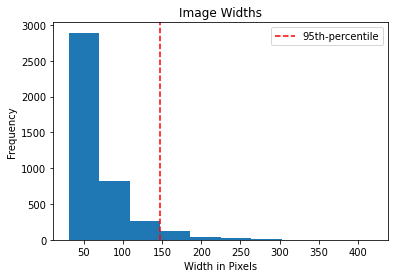

In [27]:
# plot histogram of spectrograms' widths
plt.hist(img_widths)
plt.title('Image Widths')
plt.xlabel('Width in Pixels')
plt.ylabel('Frequency')
plt.axvline(x=best_width, color='r', linestyle='--', label='95th-percentile')
plt.legend()

In [125]:
def preprocess(file):
    """
    gets audio file and returns an image of its Mel spectrogram of optimal width 

    :param file: filepath of an audio file
    :return: plot figure of its Mel spectrogram of the audio wave
    """
    spec = audio_to_spectrogram(file)
    processed_spec = pad_or_crop_spectrogram(spec, best_width)
    fig = plt.figure()
    librosa.display.specshow(librosa.power_to_db(processed_spec, ref=np.max))
    return fig

## Create Directories with Spectrogram Images

In [ ]:
from process_files import train_files, val_files, test_files
from audio_analysis import preprocess
import os
import matplotlib.pyplot as plt
import matplotlib

matplotlib.use('Agg')

def create_directory(folder, files_dict):
    """
    This function is used for the creation of the image directories of the training, validation and test set.
    It creates a directory with folders whose names are the speakers ids and it saves inside them the spectrogram 
    images that get extracted from their audio files.

    :param folder: folder name of directory to be created
    :param files_dict: dictionary that maps speaker ids to their audio files
    :return: 
    """
    os.mkdir(folder)
    for id in files_dict.keys():
        subfolder = os.path.join(folder,id)
        os.mkdir(subfolder)
        for i, file in enumerate(files_dict[id]): 
            fig = preprocess(file)
            file_name = os.path.join(subfolder, str(i) + '.png')
            plt.savefig(file_name, bbox_inches='tight', pad_inches=0)
            fig.clear()
            plt.close(fig)
    return


# create directory for training set 
folder = os.path.join('data', 'train')
create_directory(folder, train_files)

# create directory for validation set 
folder = os.path.join('data', 'val')
create_directory(folder, val_files)

# create directory for test set
folder = os.path.join('data', 'test')
create_directory(folder, test_files)

## Visualize Spectrograms

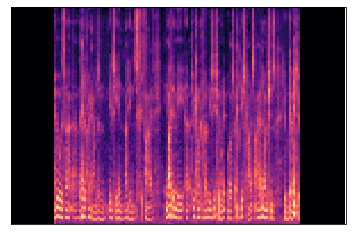

In [161]:
preprocess(files_dict['id10203'][0])
plt.show()

# Train Model

In [29]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import pandas as pd
import os

## Generate Datasets from Spectrogram Images

In [35]:
# get dataset directories
train_dir = os.path.join('data', 'train')
val_dir = os.path.join('data', 'val')
test_dir = os.path.join('data', 'test')

In [37]:
# set dataset loader parameters
BATCH_SIZE = 64
IMG_HEIGHT = 128
IMG_WIDTH = 128   # we resize the images to have same width/length
N_CHANNELS = 3

# create a DataGenerator instance that rescales images
img_gen = ImageDataGenerator(rescale=1./255)

In [38]:
# load training dataset
train_ds = img_gen.flow_from_directory(
    train_dir,
    class_mode='categorical',
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    seed=0,
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 3355 images belonging to 10 classes.


In [39]:
# load validation dataset
val_ds = img_gen.flow_from_directory(
    val_dir,
    class_mode='categorical',
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    seed=0,
    batch_size=BATCH_SIZE,
    shuffle=True
)

Found 420 images belonging to 10 classes.


In [40]:
# load test dataset
img_gen = ImageDataGenerator(rescale=1./255)
test_ds = img_gen.flow_from_directory(
    test_dir,
    class_mode='categorical',
    target_size=(IMG_HEIGHT,IMG_WIDTH),
    seed=0,
    batch_size=BATCH_SIZE
)

Found 420 images belonging to 10 classes.


## Build Model

In [41]:
model = Sequential([
  layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, N_CHANNELS)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(300, activation='relu'),
  layers.Dropout((0.5)),
  layers.Dense(10, activation='softmax')
])

In [43]:
# print model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 300)               9830700   
_________________________________________________________________
dropout (Dropout)            (None, 300)               0

## Compile Model

In [45]:
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'])

## Train CNN

In [46]:
epochs = 50
early_stopping = EarlyStopping(
    min_delta=0.001, 
    patience=5, 
    restore_best_weights=True,
)

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[early_stopping]
)

Epoch 1/50
53/53 [==============================] - 25s 463ms/step - loss: 2.2849 - accuracy: 0.1744 - val_loss: 2.1437 - val_accuracy: 0.2405
Epoch 2/50
53/53 [==============================] - 23s 424ms/step - loss: 1.8502 - accuracy: 0.3541 - val_loss: 1.6832 - val_accuracy: 0.4524
Epoch 3/50
53/53 [==============================] - 23s 430ms/step - loss: 1.2948 - accuracy: 0.5765 - val_loss: 1.3047 - val_accuracy: 0.5595
Epoch 4/50
53/53 [==============================] - 23s 435ms/step - loss: 0.8197 - accuracy: 0.7303 - val_loss: 1.1404 - val_accuracy: 0.6690
Epoch 5/50
53/53 [==============================] - 24s 454ms/step - loss: 0.5949 - accuracy: 0.8179 - val_loss: 0.9015 - val_accuracy: 0.7095
Epoch 6/50
53/53 [==============================] - 23s 436ms/step - loss: 0.4105 - accuracy: 0.8674 - val_loss: 0.9526 - val_accuracy: 0.7214
Epoch 7/50
53/53 [==============================] - 23s 440ms/step - loss: 0.3328 - accuracy: 0.8948 - val_loss: 0.7987 - val_accuracy: 0.7476

## Learning Curves Plots

Text(0.5, 0, 'Epochs')

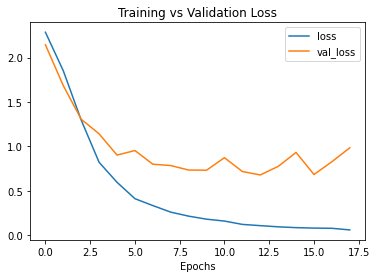

In [50]:
# plot training vs validation loss 
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot(title='Training vs Validation Loss')
plt.xlabel('Epochs')

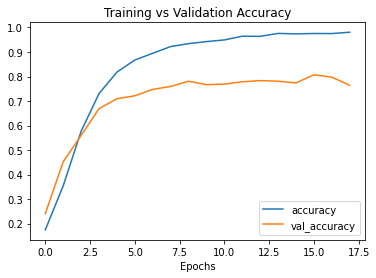

In [51]:
# plot training vs validation accuracy
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot(title='Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.savefig(os.path.join('plots', 'accuracy.png'))

From the loss plot we observe that the training loss keeps decreasing, but that is not the case for the validation loss. This could be due to the size of our dataset. Another reason could be the files that consist the validation set. The validation set was created in a way that the files that correspond to each speaker were selected to be their first 10 files in the dict_files dictionary. This means that the files taken from a speaker are not from many different interviews. BatchNormalization layers yer also used between each layer but they caused the CNN to overfit for the first 4-8 epochs. Also, different optimizers and learning rates were tested, but could not further increase the model's performance. 

# Model Evaluation

In [65]:
from keras.preprocessing import image
from keras.models import load_model
import numpy as np

In [48]:
# evaluate model on test set
score = model.evaluate(test_ds, verbose=1, steps=len(test_ds)) 
test_loss = round(score[0],3)
test_accuracy = round(score[1],3)*100
print('Test loss:', test_loss) 
print(f'Test accuracy: {test_accuracy} %\n')

7/7 [==============================] - 2s 299ms/step - loss: 0.3413 - accuracy: 0.8905
Test loss: 0.341
Test accuracy: 89.0 %



## Make some predictions

In [52]:
# get some spectrograms images from the test set
files = [
    os.path.join(test_dir, 'id10203'+ os.sep + '15.png'),
    os.path.join(test_dir, 'id10343'+ os.sep + '41.png'),
    os.path.join(test_dir, 'id10397'+ os.sep + '5.png'),
    os.path.join(test_dir, 'id10710'+ os.sep + '0.png'),
    os.path.join(test_dir, 'id11184'+ os.sep + '11.png'),
    os.path.join(test_dir, 'id10945'+ os.sep + '10.png'),
]

In [67]:
def prepare(file):
    """
    This function gets an image and prepares it to feed it to the CNN.

    :param file: filepath of image
    :return: 1 batch of the image as numpy array
    """
    img = image.load_img(file, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img = image.img_to_array(img)
    img = img / 255.
    img = np.expand_dims(img, axis=0)
    return img

# get class names
folders = glob("data/test/*") 
classes = [os.path.basename(folder) for folder in folders]
classes = sorted(class_names) 

for i, file in enumerate(files):
    # prepare image
    test_img = prepare(file)
    # get softmax probability for each class
    prob = model.predict(test_img)
    index = np.argmax(prob)
    prob_max = np.max(prob)
    prob_max = round(float(prob_max),3) * 100
    # get predicted spaker name
    id = class_names[index]
    pred_speaker = metadata.loc[metadata['VoxCeleb1 ID'] == id]
    pred_name = pred_speaker['VGGFace1 ID'].item()
    # get true speaker name
    true_id = os.path.basename(os.path.dirname(file))
    true_speaker = metadata.loc[metadata['VoxCeleb1 ID'] == true_id]
    true_name = true_speaker['VGGFace1 ID'].item()
    # print results 
    print('Prediction: ', i + 1)
    print(f'Predicted speaker {pred_name} with probability {round(prob_max,3)} %')
    print('True speaker name:', true_name)
    print('')


Prediction:  1
Predicted speaker David_Attenborough with probability 97.6 %
True speaker name: David_Attenborough

Prediction:  2
Predicted speaker Gloria_Steinem with probability 99.5 %
True speaker name: Gloria_Steinem

Prediction:  3
Predicted speaker J.J._Abrams with probability 99.9 %
True speaker name: J.J._Abrams

Prediction:  4
Predicted speaker Louis_C.K. with probability 90.4 %
True speaker name: Louis_C.K.

Prediction:  5
Predicted speaker Tom_Hooper with probability 99.9 %
True speaker name: Tom_Hooper

Prediction:  6
Predicted speaker Quentin_Tarantino with probability 73.0 %
True speaker name: Quentin_Tarantino



The speakers that were selected for these predictions have different genders and nationalities.